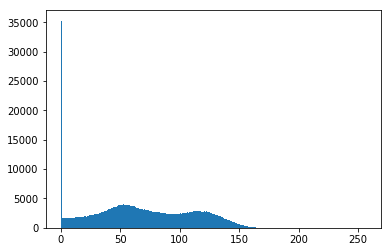

In [72]:
#importing the photo and plotting a histogram of values
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild052.tif',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

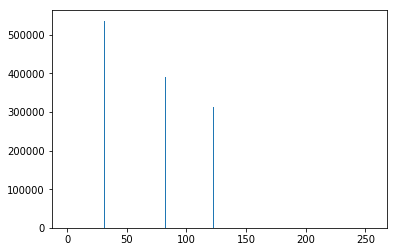

In [76]:
#quantizing
from PIL import Image
im=Image.open('cropped_Wild052.tif')

#plotting the quantized histogram
image=im.quantize(3,0)
image.save('simple_Wild052.tif')
newimg = cv2.imread('simple_Wild052.tif')
plt.hist(newimg.ravel(),256,[0,255]); plt.show()
newnewimg=newimg[:,:,0]

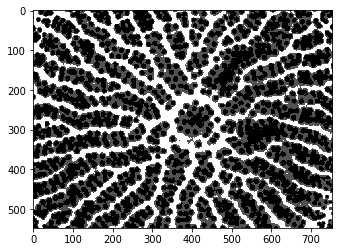

In [63]:
#maximizing color contrast
maximum= np.amax(newimg)
minimum=np.amin(newimg)

newimg[np.where(newimg == [maximum])] = [255]
newimg[np.where(newimg == [minimum])] = [0]
plt.imshow(newimg, cmap='gray')

In [57]:
#blurring and thresholding
ablur = cv2.blur(newnewimg,(21, 21))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,51,4) 

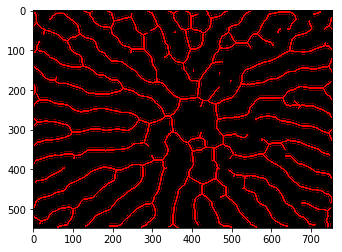

In [75]:
#creating a custom colormap
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)

#skeletonizing
from skimage.morphology import skeletonize
adaptiveskeleton = skeletonize(a_mthres)
ax = plt.subplot()
ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc')

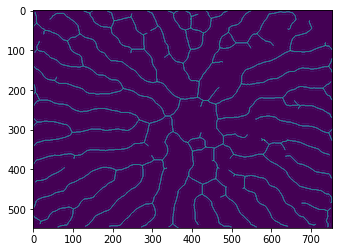

In [61]:
#removing the dots
from skimage.morphology import remove_small_objects
cleanskel=remove_small_objects(adaptiveskeleton, min_size=50, connectivity=3)
plot = plt.subplot()
plot.imshow(cleanskel, interpolation='sinc') 

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


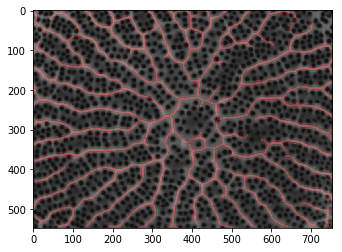

In [77]:
#overlaying the skeleton and the original image
import matplotlib.image as mpimg
img2=mpimg.imread('cropped_Wild052.tif')
imgplot2 = plt.imshow(img2, alpha= .9)
ax2 = plt.subplot()
ax2.imshow(cleanskel, cmap=red2, interpolation='sinc', alpha=0.3) 
plt.show()

In [65]:
import skimage.measure
print(skimage.measure.perimeter(cleanskel))
props=skimage.measure.regionprops(img)
props[0].centroid
#works if you use img

10701.292670203642


(271.37330873308736, 360.750307503075)

(548, 754)